In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
class Adaline:
    
    def __init__(self, x):
        np.random.seed(59)
        self.weights = np.random.rand(x.shape[1])
        
        self.pretrained = False
        
        
    def train(self, epochs, LR, X_train, Y_train, batch, stop):
            
            
            acc = []
            
            # porcentagem de erro (1 - acc)
            errors = []
            
            iterations = X_train.shape[0]

            # atualiza peso a cada epoch, ou seja, depois de percorrer todo conjunto de dados
            if batch == True:
                for epoch in range(epochs):
                    u = np.dot(X_train, self.weights)
                    
                    
                    error = np.sum((Y_train != np.sign(u)).astype(int))

                    
                    self.weights = self.weights + LR * np.dot((Y_train - u),  X_train)
                    
                    errors.append(error/iterations)
                    acc.append(1 - (error/iterations))
                    
            # atualiza peso a cada iteração
            else:
                for epoch in range(epochs):
                    erros = 0
                    acertos = 0
                    
                    for i in range (iterations):
                        u = np.dot(self.weights, X_train[i])
                        
                        
                        self.weights = self.weights + LR *( (Y_train[i] - u) * X_train[i])
                        
                        erros += int(Y_train[i] != np.sign(u))
                        
                    errors.append(erros/iterations)
                    acc.append(1 - (erros/iterations))
                        
                        
            self.loss = errors
            self.acc_train = acc
            self.pretrained = True
                
        
        
        
    def eval(self, X_test, Y_test):
        if not self.pretrained :
            raise RuntimeError("Model is not pretrained")
        
        erros = 0
        acertos = 0
        iterations = X_test.shape[0]

        for i in range(iterations):
            u = np.dot(X_test[i], self.weights)

            y = np.sign(u)
                        
            erros += int(Y_test[i] != y)
            acertos += int(Y_test[i] == y)
            

        

        return erros/iterations, acertos/iterations
    
        
        
        
    def plot_training_metrics(self, concat=""):
        
            if not self.pretrained:
                raise RuntimeError("Modelo precisa estar treinado antes")

            plt.figure(figsize=(12, 6))

            plt.subplot(1, 2, 1)
            sns.lineplot(x=range(len(self.loss)), y=self.loss, marker='o')
            plt.title("Perda (Loss) durante o Treinamento" + concat)
            plt.xlabel("Épocas")
            plt.ylabel("Loss")
            plt.ylim(0, 1)  #

            plt.subplot(1, 2, 2)
            sns.lineplot(x=range(len(self.acc_train)), y=self.acc_train, marker='o')
            plt.title("Acurácia durante o Treinamento" + concat)
            plt.xlabel("Épocas")
            plt.ylabel("Acurácia")
            plt.ylim(0, 1)  

            plt.tight_layout()
            plt.show()
            
            
    def plot_decision_boundary_train(self, X_train, Y_train):
            if not self.pretrained:
                raise RuntimeError("Modelo precisa estar treinado antes de plotar a fronteira de decisão")


            # Removendo o bias do conjunto
            X_train  = X_train[:, 1:]
            self.weights= self.weights[1:]

            plt.figure(figsize=(10, 6))

            
            sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=Y_train, palette='coolwarm', style=Y_train, markers=['o', 's'], s=100)

            x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
            y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
            xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

            Z = np.dot(np.c_[xx.ravel(), yy.ravel()], self.weights)  
            Z = Z.reshape(xx.shape)

            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k', linestyles='--')

            plt.title("Fronteira de Decisão - Dados de Treinamento")
            plt.xlabel("x1")
            plt.ylabel("x2")
            plt.legend(title="Classes")
            plt.tight_layout()
            plt.show()
    
            
            
    def plot_decision_boundary_test(self, X_test, Y_test):
            if not self.pretrained:
                raise RuntimeError("Modelo precisa estar treinado antes de plotar a fronteira de decisão")



            # Removendo o bias do conjunto
            X_test  = X_test[:, 1:]
            plt.figure(figsize=(10, 6))

            sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=Y_test, palette='coolwarm', style=Y_test, markers=['X', 'D'], s=100)

        
            x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
            y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
            xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

            Z = np.dot(np.c_[xx.ravel(), yy.ravel()], self.weights)  # produto escalar
            Z = Z.reshape(xx.shape)

            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k', linestyles='--')

            plt.title("Fronteira de Decisão - Dados de Teste")
            plt.xlabel("x1")
            plt.ylabel("x2")
            plt.legend(title="Classes")
            plt.tight_layout()
            plt.show()



## Lendo arquivos dataset

In [12]:

def load_file_dataset(filename):
    df_train = pd.read_csv(filename)
    
    X =  df_train.drop('label', axis=1).values
    Y = df_train['label'].values

    # adicionando bias constante 1
    X = np.hstack((np.ones((X.shape[0], 1)), X))


    
    return X, Y 




## Dataset 1


 Melhor acurácia encontrada na epoch 1: 0.65


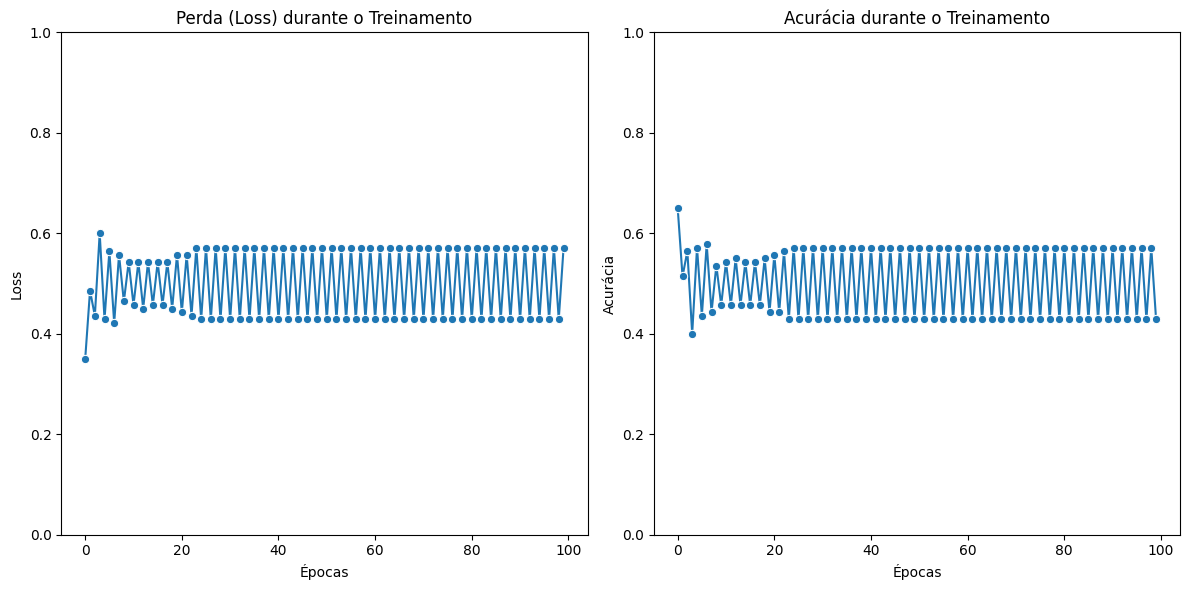

 Perda nos dados de teste: 0.417
 Acurácia nos dados de teste: 0.583


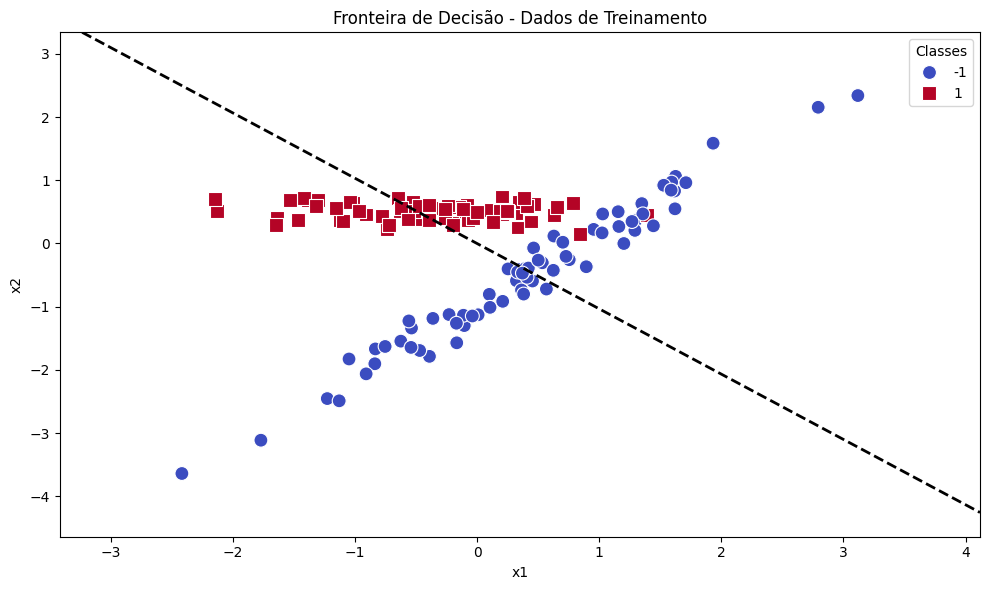

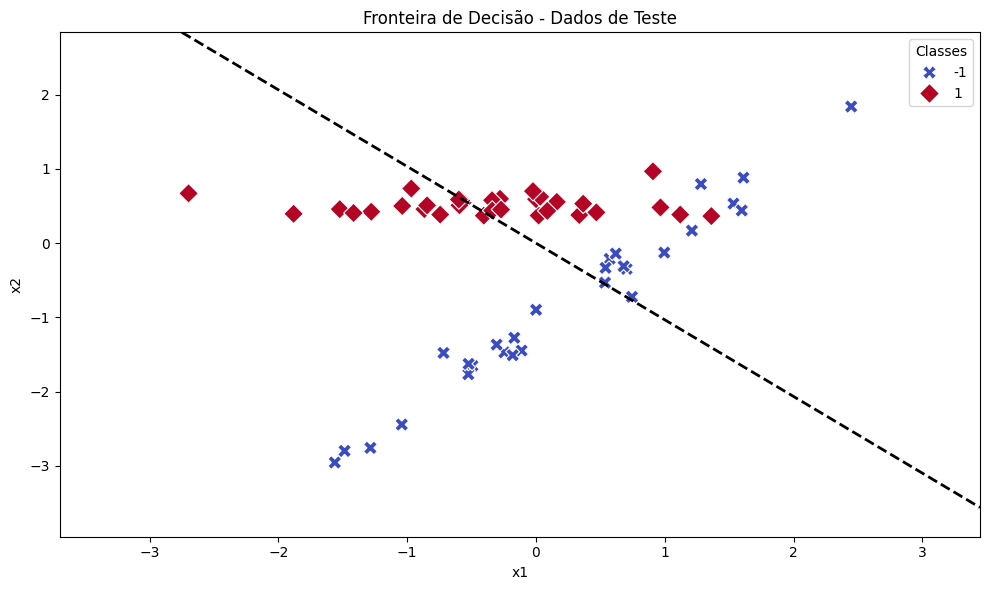

In [13]:

X_train, Y_train = load_file_dataset("train_dataset1.csv")
X_test, Y_test = load_file_dataset("test_dataset1.csv")


adaline = Adaline(x=X_train)

adaline.train(100, 0.1, X_train, Y_train, batch=True, stop=0)

best_epoch = np.argmin(adaline.loss)
print(f" Melhor acurácia encontrada na epoch {best_epoch + 1}: {round(adaline.acc_train[best_epoch],3)}")

adaline.plot_training_metrics()


loss, acc = adaline.eval(X_test, Y_test)

print(f" Perda nos dados de teste: {round (loss,3)}")
print(f" Acurácia nos dados de teste: {round(acc, 3)}")

adaline.plot_decision_boundary_train(X_train, Y_train)
adaline.plot_decision_boundary_test(X_test, Y_test)


 Melhor acurácia encontrada na epoch 12: 0.686


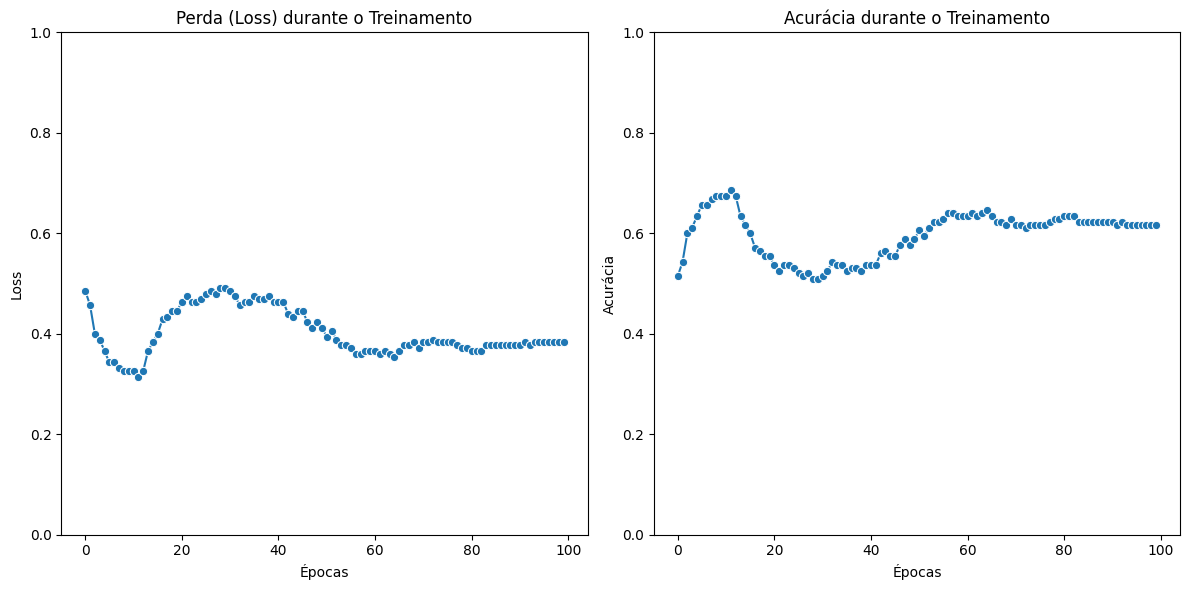

 Perda nos dados de teste: 0.493
 Acurácia nos dados de teste: 0.507


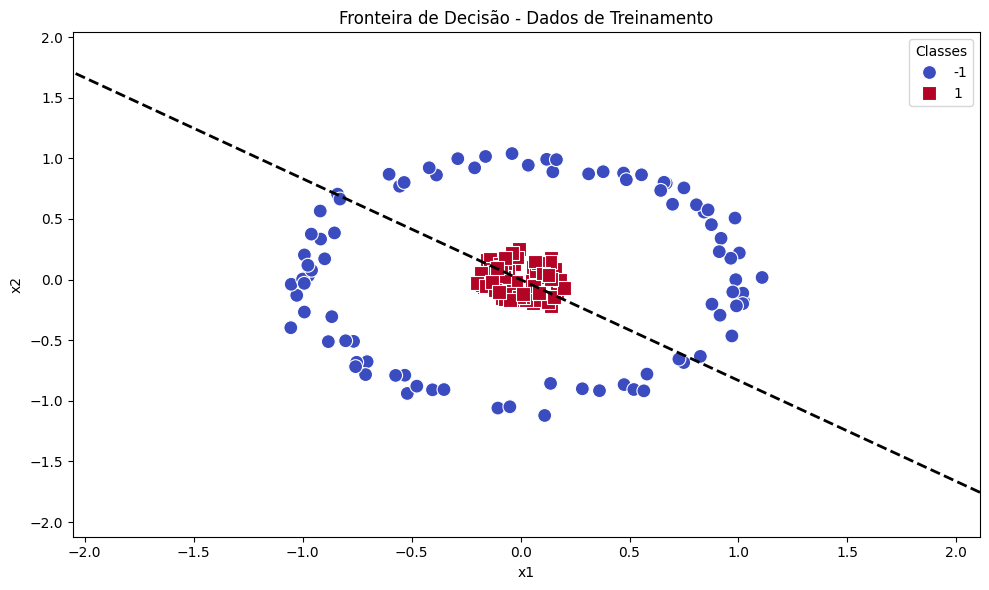

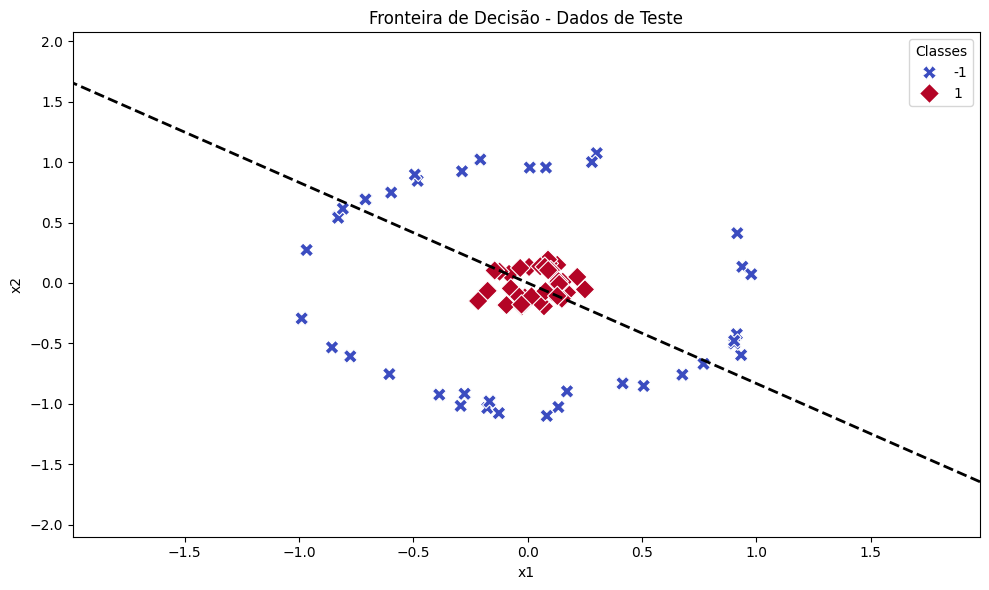

In [14]:

X_train, Y_train = load_file_dataset("train_dataset2.csv")
X_test, Y_test = load_file_dataset("test_dataset2.csv")


adaline = Adaline(x=X_train)

adaline.train(100, 0.001, X_train, Y_train, batch=True, stop=0)

best_epoch = np.argmin(adaline.loss)
print(f" Melhor acurácia encontrada na epoch {best_epoch + 1}: {round(adaline.acc_train[best_epoch],3)}")

adaline.plot_training_metrics()


loss, acc = adaline.eval(X_test, Y_test)

print(f" Perda nos dados de teste: {round (loss,3)}")
print(f" Acurácia nos dados de teste: {round(acc, 3)}")

adaline.plot_decision_boundary_train(X_train, Y_train)
adaline.plot_decision_boundary_test(X_test, Y_test)


##  Dataset 3

 Melhor acurácia encontrada na epoch 21: 0.946


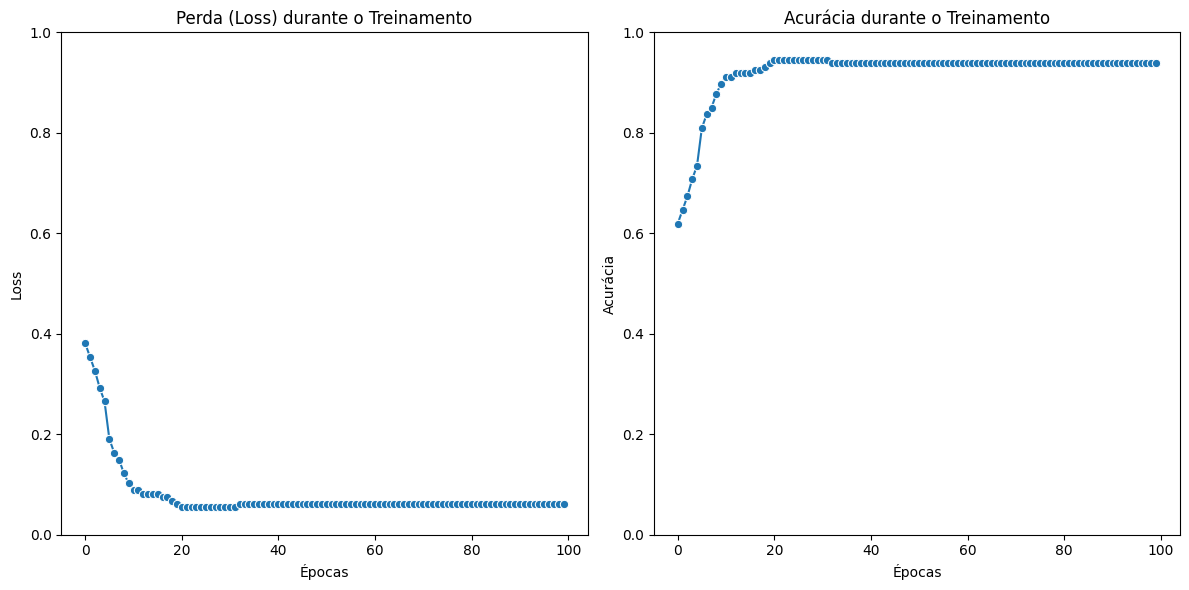

 Perda nos dados de teste: 0.143
 Acurácia nos dados de teste: 0.857
 Melhor acurácia encontrada na epoch 95: 0.898


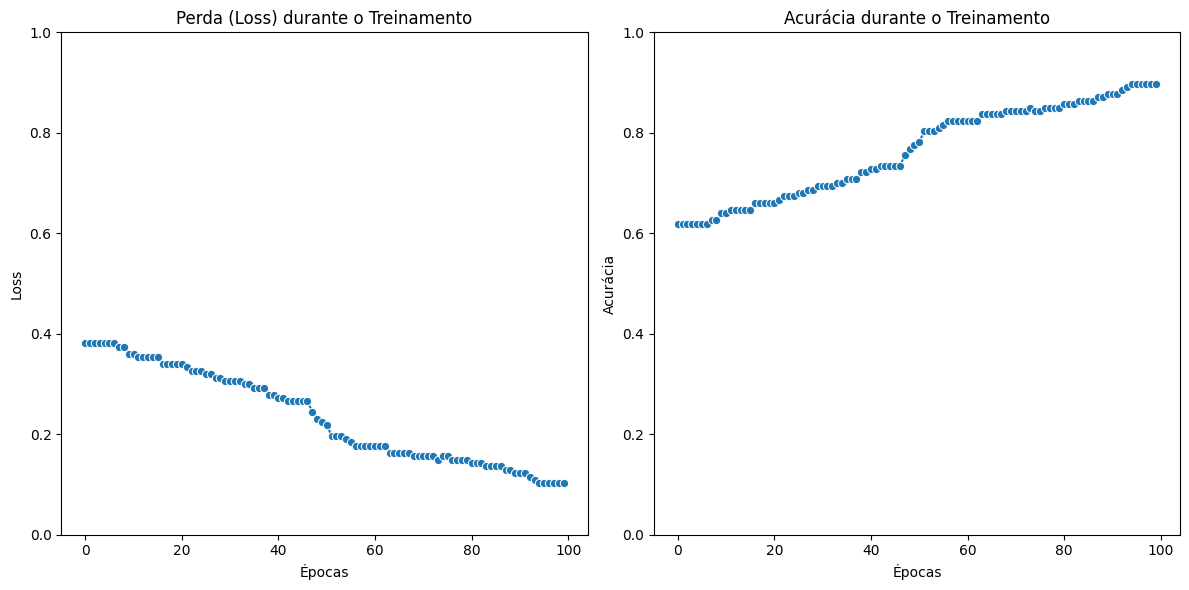

 Perda nos dados de teste: 0.143
 Acurácia nos dados de teste: 0.857


In [15]:
X_train, Y_train = load_file_dataset("train_dataset3.csv")
X_test, Y_test = load_file_dataset("test_dataset3.csv")

LR = [0.001, 0.0001]


for lr in LR:
    adaline = Adaline(x=X_train)

    adaline.train(100, lr, X_train, Y_train, batch=True, stop=0)

    best_epoch = np.argmin(adaline.loss)
    print(f" Melhor acurácia encontrada na epoch {best_epoch + 1}: {round(adaline.acc_train[best_epoch],3)}")

    adaline.plot_training_metrics()


    loss, acc = adaline.eval(X_test, Y_test)

    print(f" Perda nos dados de teste: {round (loss,3)}")
    print(f" Acurácia nos dados de teste: {round(acc, 3)}")

    